# Minimal cluster analysis

In [2]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt


I create a random binary image (through thresholding).

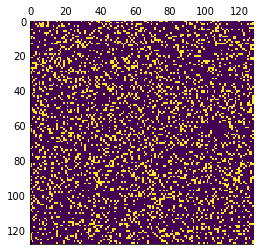

In [16]:
image = np.random.uniform(0, 1, (128, 128))
im = (image > 0.8).astype(int)

plt.matshow(im)


I can then label connected regions, by specifying the structuring element (kernel).

In [17]:
kernel = [[1, 1, 1], [1, 1, 1], [1, 1, 1]]
labelled, nlabels = ndimage.label(im, structure=kernel)


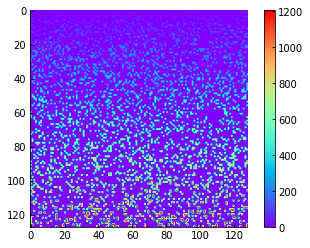

In [18]:
plt.imshow(labelled, cmap=plt.cm.rainbow)
plt.colorbar()


I count the number of pixels with a certain label (ignoring label 0 because it is the background)

In [32]:
cluster_sizes = np.bincount(labelled.flatten())[1:]


And plot the probability distribution with logarithmically spaced bins

Text(0, 0.5, 'pdf')

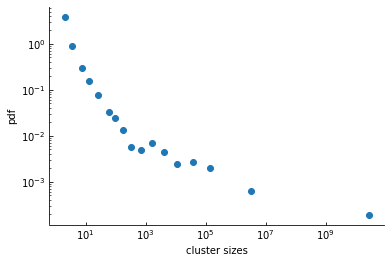

In [35]:
minimum = cluster_sizes.min()
maximum = cluster_sizes.max()
bin_edges = np.logspace(np.log2(minimum), np.log2(maximum), 32, base=2)
hist, edges = np.histogram(cluster_sizes, bins=bin_edges, density=True)
plt.plot(2 ** bin_edges[:-1], hist, "o")
plt.yscale("log")
plt.xscale("log")
plt.xlabel("cluster sizes")
plt.ylabel("pdf")
